<a href="https://colab.research.google.com/github/Madhumita-Joshi/User-Verification-Using-Keystroke-Analysis/blob/main/Keystroke_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Biometric Mini Project**

Group members :

Shubham Bagdare ( N003 )

Madhumita Joshi ( N015 )

Harsh Kharabe ( N017 )

<h2>Application of Keystroke Biometrics to build a 2 class classifier </h2>


In [ ]:
# Importing keystroke dataset
# password :  .tie5Roanl
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sn
data=pd.read_csv("Keystroke.csv")
data = pd.DataFrame(data)
subjects = data["subject"].unique()


**Data Exploration**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20400 entries, 0 to 20399
Data columns (total 34 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   subject          20400 non-null  object 
 1   sessionIndex     20400 non-null  int64  
 2   rep              20400 non-null  int64  
 3   H.period         20400 non-null  float64
 4   DD.period.t      20400 non-null  float64
 5   UD.period.t      20400 non-null  float64
 6   H.t              20400 non-null  float64
 7   DD.t.i           20400 non-null  float64
 8   UD.t.i           20400 non-null  float64
 9   H.i              20400 non-null  float64
 10  DD.i.e           20400 non-null  float64
 11  UD.i.e           20400 non-null  float64
 12  H.e              20400 non-null  float64
 13  DD.e.five        20400 non-null  float64
 14  UD.e.five        20400 non-null  float64
 15  H.five           20400 non-null  float64
 16  DD.five.Shift.r  20400 non-null  float64
 17  UD.five.Shif

In [ ]:
data.head()

,subject,sessionIndex,rep,H.period,DD.period.t,UD.period.t,H.t,DD.t.i,UD.t.i,H.i,DD.i.e,UD.i.e,H.e,DD.e.five,UD.e.five,H.five,DD.five.Shift.r,UD.five.Shift.r,H.Shift.r,DD.Shift.r.o,UD.Shift.r.o,H.o,DD.o.a,UD.o.a,H.a,DD.a.n,UD.a.n,H.n,DD.n.l,UD.n.l,H.l,DD.l.Return,UD.l.Return,H.Return
0,s002,1,1,0.1491,0.3979,0.2488,0.1069,0.1674,0.0605,0.1169,0.2212,0.1043,0.1417,1.1885,1.0468,0.1146,1.6055,1.4909,0.1067,0.7590,0.6523,0.1016,0.2136,0.1120,0.1349,0.1484,0.0135,0.0932,0.3515,0.2583,0.1338,0.3509,0.2171,0.0742
1,s002,1,2,0.1111,0.3451,0.2340,0.0694,0.1283,0.0589,0.0908,0.1357,0.0449,0.0829,1.1970,1.1141,0.0689,0.7822,0.7133,0.1570,0.7877,0.6307,0.1066,0.1684,0.0618,0.1412,0.2558,0.1146,0.1146,0.2642,0.1496,0.0839,0.2756,0.1917,0.0747
2,s002,1,3,0.1328,0.2072,0.0744,0.0731,0.1291,0.0560,0.0821,0.1542,0.0721,0.0808,1.0408,0.9600,0.0892,0.6203,0.5311,0.1454,0.7195,0.5741,0.1365,0.2931,0.1566,0.1621,0.2332,0.0711,0.1172,0.2705,0.1533,0.1085,0.2847,0.1762,0.0945
3,s002,1,4,0.1291,0.2515,0.1224,0.1059,0.2495,0.1436,0.1040,0.2038,0.0998,0.0900,1.0556,0.9656,0.0913,1.2564,1.1651,0.1454,0.7550,0.6096,0.0956,0.1530,0.0574,0.1457,0.1629,0.0172,0.0866,0.2341,0.1475,0.0845,0.3232,0.2387,0.0813
4,s002,1,5,0.1249,0.2317,0.1068,0.0895,0.1676,0.0781,0.0903,0.1589,0.0686,0.0805,0.8629,0.7824,0.0742,0.8955,0.8213,0.1243,0.7632,0.6389,0.0430,0.1975,0.1545,0.1312,0.1582,0.0270,0.0884,0.2517,0.1633,0.0903,0.2517,0.1614,0.0818


In [ ]:
data.shape

(20400, 34)

In [ ]:
subjects

array(['s002', 's003', 's004', 's005', 's007', 's008', 's010', 's011',
       's012', 's013', 's015', 's016', 's017', 's018', 's019', 's020',
       's021', 's022', 's024', 's025', 's026', 's027', 's028', 's029',
       's030', 's031', 's032', 's033', 's034', 's035', 's036', 's037',
       's038', 's039', 's040', 's041', 's042', 's043', 's044', 's046',
       's047', 's048', 's049', 's050', 's051', 's052', 's053', 's054',
       's055', 's056', 's057'], dtype=object)

In [ ]:
len(subjects)  # 51 unique users 

51

In [ ]:
from sklearn.metrics import roc_curve
def evaluateEER(user_scores, imposter_scores):
    block = []
    labels = [0]*len(user_scores) + [1]*len(imposter_scores)
    fpr, tpr, threshold = roc_curve(labels, user_scores + imposter_scores)
    fnr = 1 - tpr
    farates = fpr
       
    eer = fpr[np.nanargmin(np.absolute((fnr - fpr)))]
    eer_threshold = threshold[np.nanargmin(np.absolute((fnr - fpr)))]

    block.append(eer)
    block.append(eer_threshold)
    

    return block

**Unfiltered Manhattan Detector**

In [ ]:
from scipy.spatial.distance import cityblock
import numpy as np
np.set_printoptions(suppress = True)
import pandas
import math
class UnfilteredManhattanDetector:
  
    def __init__(self, subjects):
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
  
    def training(self):
        self.mean_vector = self.train.mean().values
        
        
    def testing(self):
        #   Calculates city block distance bw 2 arrays
        
        for i in range(self.test_genuine.shape[0]):
            cur_score = cityblock(self.test_genuine.iloc[i].values, \
                                   self.mean_vector)
            self.user_scores.append(cur_score)
  
        for i in range(self.test_imposter.shape[0]):
            cur_score = cityblock(self.test_imposter.iloc[i].values, \
                                   self.mean_vector)
            self.imposter_scores.append(cur_score)
  
    def evaluate(self):
        system_data = []
        eers = []
        thresholds = []
        for subject in subjects:        
            genuine_user_data = data.loc[data.subject == subject, \
                                         "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
             
            # Splitting data into train test set (80-20 split, starting from first row)
            '''
            self.train = genuine_user_data[:320]
            self.test_genuine = genuine_user_data[320:]
            '''

            # Splitting data into train test split (80-20 split, random)
            
            self.train=genuine_user_data.sample(frac=0.8, random_state=0) #random state is a seed value
            self.test_genuine=genuine_user_data.drop(self.train.index)
            

            self.test_imposter = imposter_data.groupby("subject"). \
                                 head(5).loc[:, "H.period":"H.Return"]
         
            self.training()  
            self.testing()
            system_data.append(evaluateEER(self.user_scores,self.imposter_scores))
          
        
        for i in range(len(system_data)):
          if i%2 == 1:
            eers.append(system_data[i][0])
          else:
            thresholds.append(system_data[i][1])
        
        eer = np.mean(eers)
        threshold = np.mean(thresholds)
        print ("EER for UnfilteredManhattanDetector :",eer)
        print ("Threshold for UnfilteredManhattanDetector :",threshold)

        
 

UnfilteredManhattanDetector(subjects).evaluate()

EER for UnfilteredManhattanDetector : 0.14327413051026502
Threshold for UnfilteredManhattanDetector : 2.0144775360576928


**Unfiltered Euclidean**

In [ ]:
from scipy.spatial.distance import cityblock
from scipy.spatial.distance import euclidean
import numpy as np
np.set_printoptions(suppress = True)
import pandas
import math
class UnfilteredEuclideanDetector:
  
    def __init__(self, subjects):
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
  
    def training(self):
        self.mean_vector = self.train.mean().values
        
        
    def testing(self):
        #   Calculates city block distance bw 2 arrays
        
        for i in range(self.test_genuine.shape[0]):
            cur_score = euclidean(self.test_genuine.iloc[i].values, \
                                   self.mean_vector)
            self.user_scores.append(cur_score)
  
        for i in range(self.test_imposter.shape[0]):
            cur_score = euclidean(self.test_imposter.iloc[i].values, \
                                   self.mean_vector)
            self.imposter_scores.append(cur_score)
  
    def evaluate(self):
        system_data = []
        eers = []
        thresholds = []
        for subject in subjects:        
            genuine_user_data = data.loc[data.subject == subject, \
                                         "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
             
            # Splitting data into train test set
            '''
            self.train = genuine_user_data[:320]
            self.test_genuine = genuine_user_data[320:]
            '''

            # Splitting data into train test split (80-20 split, random)
            
            self.train=genuine_user_data.sample(frac=0.8, random_state=0) #random state is a seed value
            self.test_genuine=genuine_user_data.drop(self.train.index)
            

            self.test_imposter = imposter_data.groupby("subject"). \
                                 head(5).loc[:, "H.period":"H.Return"]
         
            self.training()  
            self.testing()
            system_data.append(evaluateEER(self.user_scores,self.imposter_scores))
          
        
        for i in range(len(system_data)):
          if i%2 == 1:
            eers.append(system_data[i][0])
          else:
            thresholds.append(system_data[i][1])
        
        eer = np.mean(eers)
        threshold = np.mean(thresholds)
        print ("EER for UnfilteredEuclideanDetector :",eer)
        print ("Threshold for Unfiltered Euclidean Detector :",threshold)

        
 

UnfilteredEuclideanDetector(subjects).evaluate()

EER for UnfilteredEuclideanDetector : 0.17715755246712575
Threshold for Unfiltered Euclidean Detector : 0.586452384678851


**Filtered Manhattan**

In [ ]:
from scipy.spatial.distance import cityblock
import numpy as np
np.set_printoptions(suppress = True)
import pandas
import math
class FilteredManhattanDetector:
  
    def __init__(self, subjects):
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
  
    def training(self):
        self.mean_vector = self.train.mean().values
        self.std_vector = self.train.std().values
        dropping_indices = []
        
        for i in range(self.train.shape[0]):
            cur_score = euclidean(self.train.iloc[i].values, 
                                   self.mean_vector)
            
            if (cur_score > 3*self.std_vector).all() == True:
                dropping_indices.append(i)
        
        
        
        self.train = self.train.drop(self.train.index[dropping_indices])
        

        self.mean_vector = self.train.mean().values
        
        
    def testing(self):
        #   Calculates city block distance bw 2 arrays
        
        for i in range(self.test_genuine.shape[0]):
            cur_score = cityblock(self.test_genuine.iloc[i].values, \
                                   self.mean_vector)
            self.user_scores.append(cur_score)
  
        for i in range(self.test_imposter.shape[0]):
            cur_score = cityblock(self.test_imposter.iloc[i].values, \
                                   self.mean_vector)
            self.imposter_scores.append(cur_score)
  
    def evaluate(self):
        system_data = []
        eers = []
        thresholds = []
        for subject in subjects:        
            genuine_user_data = data.loc[data.subject == subject, \
                                         "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
             
            # Splitting data into train test set
            self.train = genuine_user_data[:320]
            self.test_genuine = genuine_user_data[320:]
            self.test_imposter = imposter_data.groupby("subject"). \
                                 head(5).loc[:, "H.period":"H.Return"]
         
            self.training()  
            self.testing()
            system_data.append(evaluateEER(self.user_scores,self.imposter_scores))
          
        
        for i in range(len(system_data)):
          if i%2 == 1:
            eers.append(system_data[i][0])
          else:
            thresholds.append(system_data[i][1])
        
        eer = np.mean(eers)
        threshold = np.mean(thresholds)
        print ("EER for FilteredManhattanDetector :",eer)
        print ("Threshold for FilteredManhattanDetector :",threshold)

        
 

FilteredManhattanDetector(subjects).evaluate()

EER for FilteredManhattanDetector : 0.13296795258306177
Threshold for FilteredManhattanDetector : 2.0117471167703433


**Filtered Euclidean**

In [ ]:
from scipy.spatial.distance import cityblock
import numpy as np
np.set_printoptions(suppress = True)
import pandas
import math
class FilteredEuclideanDetector:
  
    def __init__(self, subjects):
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
  
    def training(self):
        self.mean_vector = self.train.mean().values
        self.std_vector = self.train.std().values
        dropping_indices = []
        
        for i in range(self.train.shape[0]):
            cur_score = euclidean(self.train.iloc[i].values, 
                                   self.mean_vector)
            
            if (cur_score > 3*self.std_vector).all() == True:
                dropping_indices.append(i)
        
        self.train = self.train.drop(self.train.index[dropping_indices])
       

        self.mean_vector = self.train.mean().values
        
        
    def testing(self):
        #   Calculates city block distance bw 2 arrays
        
        for i in range(self.test_genuine.shape[0]):
            cur_score = euclidean(self.test_genuine.iloc[i].values, \
                                   self.mean_vector)
            self.user_scores.append(cur_score)
  
        for i in range(self.test_imposter.shape[0]):
            cur_score = euclidean(self.test_imposter.iloc[i].values, \
                                   self.mean_vector)
            self.imposter_scores.append(cur_score)
  
    def evaluate(self):
        system_data = []
        eers = []
        thresholds = []
        for subject in subjects:        
            genuine_user_data = data.loc[data.subject == subject, \
                                         "H.period":"H.Return"]
            imposter_data = data.loc[data.subject != subject, :]
             
            # Splitting data into train test set
            self.train = genuine_user_data[:320]
            self.test_genuine = genuine_user_data[320:]
            self.test_imposter = imposter_data.groupby("subject"). \
                                 head(5).loc[:, "H.period":"H.Return"]
         
            self.training()  
            self.testing()
            system_data.append(evaluateEER(self.user_scores,self.imposter_scores))
          
        
        for i in range(len(system_data)):
          if i%2 == 1:
            eers.append(system_data[i][0])
          else:
            thresholds.append(system_data[i][1])
        
        eer = np.mean(eers)
        threshold = np.mean(thresholds)
        print ("EER for Filtered Euclidean Detector :",eer)
        print ("Threshold for Filtered Euclidean Detector :",threshold)

        
 

FilteredEuclideanDetector(subjects).evaluate()

EER for Filtered Euclidean Detector : 0.15234824879733194
Threshold for Filtered Euclidean Detector : 0.5685791431215116


**Classifier Visualization**


In [ ]:
class FilteredManhattanDetector:
  
    def __init__(self, subjects):
        self.threshold = 2.0117471167703433
        self.user_scores = []
        self.imposter_scores = []
        self.mean_vector = []
        self.subjects = subjects
        self.predicted = []
  
    def training(self):
        
        self.mean_vector = self.train.mean().values
        self.std_vector = self.train.std().values
        dropping_indices = []
        
        for i in range(self.train.shape[0]):
            cur_score = euclidean(self.train.iloc[i].values, 
                                   self.mean_vector)
            
            if (cur_score > 3*self.std_vector).all() == True:
                dropping_indices.append(i)
        print("No. of dropped indices:",len(dropping_indices))
        self.train = self.train.drop(self.train.index[dropping_indices])
        self.mean_vector = self.train.mean().values
        
        
    def testing(self):
        #   Calculates city block distance bw 2 arrays
        
        for i in range(self.test_genuine.shape[0]):
            cur_score = cityblock(self.test_genuine.iloc[i].values, \
                                   self.mean_vector)
           
            if cur_score < self.threshold:
               self.predicted.append('Verified')
            else:
              self.predicted.append('Intruder')
        
           
        for i in range(self.test_imposter.shape[0]):
            cur_score = cityblock(self.test_imposter.iloc[i].values, \
                                   self.mean_vector)
            self.imposter_scores.append(cur_score)

            if cur_score < self.threshold:
               self.predicted.append('Verified')
            else:
              self.predicted.append('Intruder')

        return(self.predicted)
    def evaluate(self):

            genuine_user_data = data.loc[data.subject == 's002',"H.period":"H.Return"]
            imposter_data = data.loc[data.subject != 's002', :]
             
            # Splitting data into train test set
            '''
            self.train = genuine_user_data[:320]
            self.test_genuine = genuine_user_data[320:]
            '''

            # Splitting data into train test split (80-20 split, random)
            
            self.train=genuine_user_data.sample(frac=0.8, random_state=0) #random state is a seed value
            self.test_genuine=genuine_user_data.drop(self.train.index)

            self.test_imposter = imposter_data.groupby("subject"). \
                                 head(5).loc[:, "H.period":"H.Return"]
            
         
            self.training()  
            self.testing()
            #predicted=numpy.asarray(self.predicted)
            return(self.predicted)
          
        
      
  
        

predicted=FilteredManhattanDetector(subjects).evaluate()
print(len(predicted))


No. of dropped indices: 42
330


In [ ]:
actual = []
for i in range(0,330):
  if i <80:
    actual.append('Verified')
  else:
    actual.append('Intruder')

In [ ]:
data = {'Actual':actual,'Predicted':predicted}
df = pd.DataFrame(data)

In [ ]:
df

,Actual,Predicted
0,Verified,Intruder
1,Verified,Intruder
2,Verified,Intruder
3,Verified,Intruder
4,Verified,Verified
...,...,...
325,Intruder,Intruder
326,Intruder,Verified
327,Intruder,Verified
328,Intruder,Verified


In [ ]:
print(classification_report(df['Actual'],df['Predicted']))

              precision    recall  f1-score   support

    Intruder       0.96      0.78      0.86       250
    Verified       0.57      0.90      0.70        80

    accuracy                           0.81       330
   macro avg       0.76      0.84      0.78       330
weighted avg       0.87      0.81      0.82       330



In [ ]:
confusion_matrix=confusion_matrix(df['Actual'],df['Predicted'])


In [ ]:
confusion_matrix

array([[195,  55],
       [  8,  72]])

In [ ]:
confusion_matrix1 = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

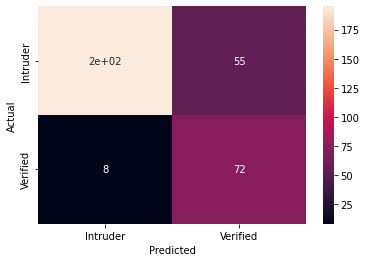

In [ ]:

sn.heatmap(confusion_matrix1, annot=True)

<h1>Conclusion<h1>

1.   Keystroke biometrics is a reliable method to build a security system.
2.   Least EER of 0.13 is provided by the Filtered Manhattan Detector.Its corresponding threshold is used to build a classifier.
3.   F1-Score is 86 and accuracy is 81% 
4.   These scores can be improved by  reducing the class imbalance.







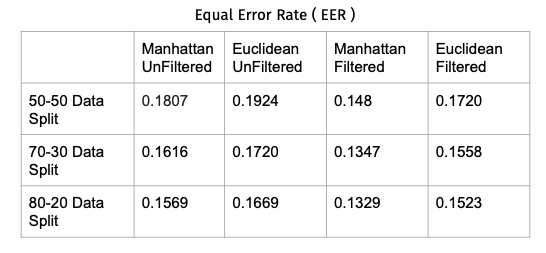

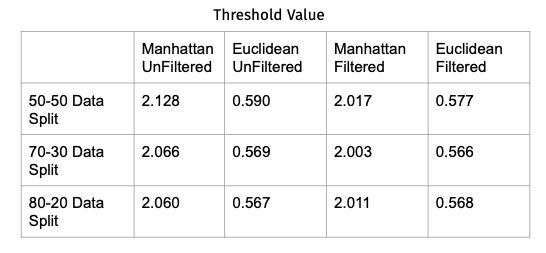